# Analyse de ventes en IDF au premier semestre 2020 

## Projet notebook (groupe Michelle, Amine, Vixra)

### A faire

- choisir un thème en groupe (medecine, sport, musique, …)
- trouver un dataset au format csv dans kaggle sur le thème choisi
- trouver une colonne à prédire
- indiquer une colonne qui pourrait d’après vos connaissances sur le dataset choisi être un bon prédicteur pour la colonne à prédire
- plotter un catplot de ces 2 colonnes (ou tout autre visu qui pourrait confirmer ou infirmer le choix précédent)
- utiliser le TP intro stats pour trouver le meilleur predicteur (ici une fonction lineaire y = ax + b), selon la methode des moindres carrés
- evaluer la qualité du predicteur en calculant son RMSE (Root Mean Squared Error)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Lecture du dataset nettoyer "ventes_appartements_idf_final.csv"
df = pd.read_csv('ventes_appartements_idf_final.csv')
df.head(2)

,Unnamed: 0,id_parcelle,nature_vente,date_vente,Prix,nb_lots,surface,local,nb_pieces,code_dprtmt,adresse_nom_voie,code_postal,longitude,latitude,Adresse
0,598682,78646000AE0175,Vente,2020-01-06,1382700.0,2,185.0,Appartement,6.0,78,RUE DES RESERVOIRS,78000.0,2.124821,48.807564,22.0 RUE DES RESERVOIRS 78000.0
1,598683,78621000AE0302,Vente,2020-01-06,148200.0,1,63.0,Appartement,3.0,78,SQ FRANCIS CARCO,78190.0,1.976229,48.776401,6.0 SQ FRANCIS CARCO 78190.0


## 1 - Répartition des ventes d'appartements au 1er semestre 2020 en IDF

In [9]:
# Permet de séparer la colonne "date_mutation" en 3 colonnes : "Annee", "Mois" et "jour"
df[['Annee','Mois','jour']] = df['date_vente'].str.split("-",expand=True)
df.head(1)

,Unnamed: 0,id_parcelle,nature_vente,date_vente,Prix,nb_lots,surface,local,nb_pieces,code_dprtmt,adresse_nom_voie,code_postal,longitude,latitude,Adresse,Annee,Mois,jour
0,598682,78646000AE0175,Vente,2020-01-06,1382700.0,2,185.0,Appartement,6.0,78,RUE DES RESERVOIRS,78000.0,2.124821,48.807564,22.0 RUE DES RESERVOIRS 78000.0,2020,01,06


In [10]:
# Permet de grouper par mois le nombre d'appartement vendus sur toute l'Ile de France
df.groupby('Mois')[['local']].count()

,local
Mois,
01,10270
02,9136
03,7601
04,4297
05,8399
06,8208


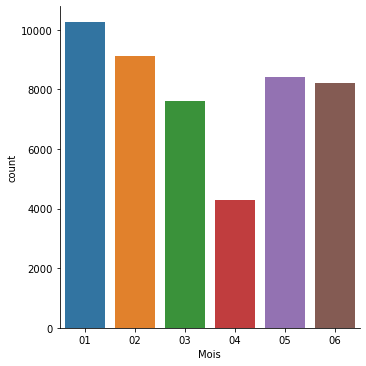

In [11]:
# Histogramme de la répartition des ventes d'appartements en Ile-de-France au 1er semestre 2020 (entre janvier et juin 2020)
sns.catplot(x='Mois',  data=df, kind='count')

## 2 - Répartition des ventes par département

In [12]:
# Permet de grouper par département le nombre d'appartement vendus
df1= df.groupby("code_dprtmt").local.count().reset_index()
df1

,code_dprtmt,local
0,75,15064
1,78,6709
2,91,4583
3,92,5594
4,93,4608
5,94,6861
6,95,4492


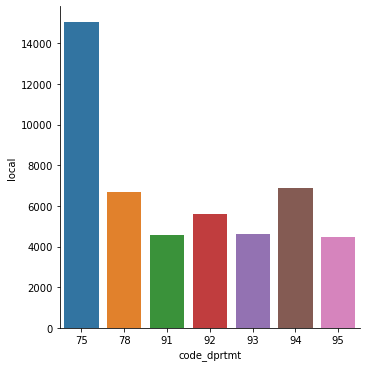

In [13]:
# Histogramme de la répartition des ventes d'appartements par département
sns.catplot(x="code_dprtmt",y='local',  data=df1, kind='bar')

###  # Autre représentation : barres horizontales

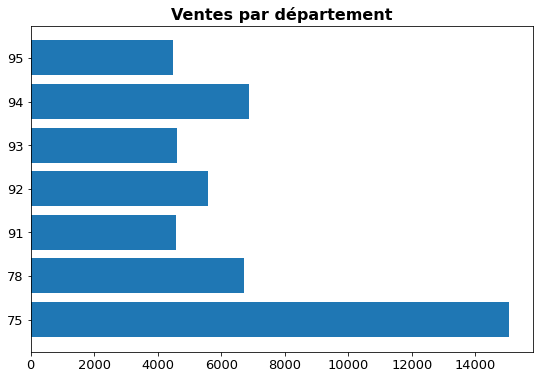

In [14]:
plt.figure(figsize = (9, 6))
plt.barh(y = (df1["code_dprtmt"]).astype(str), #this is an inverted bar chart, so the first argument is the y axis
        width = df1["local"]) #the second argument shows the x-axis or is the width
   
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Ventes par département", fontsize = 16, fontweight = "bold")
# plt.xlabel("vente", fontsize = 13 )
#plt.tight_layout()
# plt.savefig("Ice Cream Shop h.png")
plt.show()

### # Autre visualisation sous forme de "Donut"

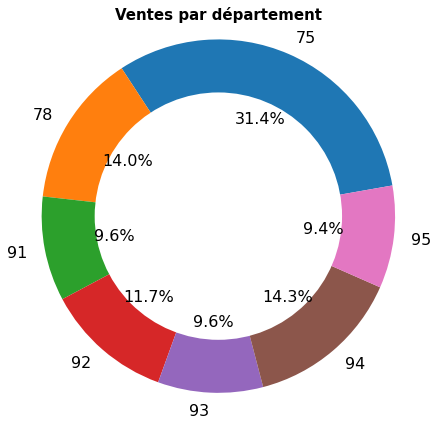

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 16

departements = ['75', '78', '91', '92','93', '94', '95']
nb_ventes =[15064, 6709, 4583, 5594, 4608, 6861, 4492]
# explode = (0, 0.1, 0)  

fig1, ax1 = plt.subplots(figsize=(7,7))
plt.title('Ventes par département', fontsize=15, weight='bold')
ax1.pie(nb_ventes,  labels=departements, autopct='%1.1f%%',
         startangle=10)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 3 -  Etude des ventes selon les arrondissements dans Paris

In [16]:
# Regardons qu'est-ce qu'il y a comme valeur dans la colonne nb_lots
df.groupby('nb_lots')['nb_lots'].count()

nb_lots
0      8276
1     17336
2     19732
3      1796
4       521
5       138
6        53
7        32
8        17
9         7
11        1
12        1
13        1
Name: nb_lots, dtype: int64

### 3.1 : Récupérerer un dataframe avec les données de paris 

In [17]:
# Récupérer les lignes qui concerne Paris avec les nb_lots entre "0" et "1"
df_paris = df[(df['code_dprtmt']==75) & 
              (df['Prix']) & 
              (df['nb_lots']<=1)
             ]
df_paris.head(2)

,Unnamed: 0,id_parcelle,nature_vente,date_vente,Prix,nb_lots,surface,local,nb_pieces,code_dprtmt,adresse_nom_voie,code_postal,longitude,latitude,Adresse,Annee,Mois,jour
32849,803610,75103000AV0006,Vente,2020-01-10,680000.0,1,51.0,Appartement,2.0,75,RUE DU BOURG L ABBE,75003.0,2.351965,48.864157,10.0 RUE DU BOURG L ABBE 75003.0,2020,01,10
32850,803611,75103000AK0080,Vente,2020-01-03,852000.0,1,19.0,Appartement,1.0,75,RUE DE SAINTONGE,75003.0,2.363196,48.862017,24.0 RUE DE SAINTONGE 75003.0,2020,01,03


In [18]:
# Enlever la colonne 'Unnamed:0' qui ne correspond à rien 
df_paris.drop(columns=['Unnamed: 0'],inplace=True)

C:\Users\Vixra KEO\anaconda3\envs\intro-conda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [19]:
# Vérifier si il y a des valeurs nulles
df_paris.isnull().sum()

id_parcelle          0
nature_vente         0
date_vente           0
Prix                 0
nb_lots              0
surface              0
local                0
nb_pieces            0
code_dprtmt          0
adresse_nom_voie     0
code_postal          0
longitude           12
latitude            12
Adresse              0
Annee                0
Mois                 0
jour                 0
dtype: int64

In [20]:
# Enlever les valeurs nulles
df_paris.dropna(inplace=True)

<ipython-input-20-465e67643cfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paris.dropna(inplace=True)


### 3.2 : Etudier la distribution des appartements vendus par arrondissement

In [21]:
# voir la distribution des ventes par arrondissement.
df_paris.groupby('code_postal')['code_postal'].count()

code_postal
75001.0    129
75002.0    206
75003.0    241
75004.0    137
75005.0    152
75006.0    164
75007.0    163
75008.0    276
75009.0    373
75010.0    483
75011.0    627
75012.0    445
75013.0    198
75014.0    324
75015.0    434
75016.0    541
75017.0    723
75018.0    849
75019.0    440
75020.0    529
Name: code_postal, dtype: int64

In [22]:
# somme des surfaces
sum_surface = df_paris.groupby('code_postal')[['surface']].sum().reset_index() # double crochet a surface pour crée dataframe 

In [23]:
# somme des prix
sum_prix = df_paris.groupby('code_postal')[['Prix']].sum().reset_index() # double crochet a prix pour crée dataframe

In [24]:
# Jointure pour créer nouveau dataframe pour réunir somme des surfaces et somme des prix par arrondissement
left = sum_surface.set_index(["code_postal"])
right = sum_prix.set_index(["code_postal"])

Prix_m2 =left.join(right)
Prix_m2

,surface,Prix
code_postal,,
75001.0,6329.0,3.707930e+08
75002.0,9002.0,8.033815e+08
75003.0,9398.0,4.268654e+08
75004.0,6862.0,9.652394e+07
75005.0,6161.0,9.530106e+07
75006.0,8527.0,2.372845e+08
75007.0,9430.0,5.732054e+08
75008.0,18018.0,3.294913e+09
75009.0,17399.0,1.860469e+09


In [25]:
# Ajout nouvelle colonne avec le prix au m² par arrondissement
Prix_m2['prix_m2_reel'] = Prix_m2['Prix'] / Prix_m2['surface']
Prix_m2.head(2)

,surface,Prix,prix_m2_reel
code_postal,,,
75001.0,6329.0,3.707930e+08,58586.344288
75002.0,9002.0,8.033815e+08,89244.779801


https://www.journaldunet.com/patrimoine/prix-immobilier/paris/ville-75056

In [26]:
# Valeurs des prix de références trouvés sur internet et copier sous forme de liste ici pour les mettre dans le dataframe "Prix_m2"
Prix_m2['prix_m2_ref']= [13312,12268,13351,13158,13059,15617,13442,12809,11702,10368,10595,9703, 9246,9940,10816,11322,11420,9904,9402,9282]
Prix_m2 

,surface,Prix,prix_m2_reel,prix_m2_ref
code_postal,,,,
75001.0,6329.0,3.707930e+08,58586.344288,13312
75002.0,9002.0,8.033815e+08,89244.779801,12268
75003.0,9398.0,4.268654e+08,45420.879070,13351
75004.0,6862.0,9.652394e+07,14066.444623,13158
75005.0,6161.0,9.530106e+07,15468.440643,13059
75006.0,8527.0,2.372845e+08,27827.434150,15617
75007.0,9430.0,5.732054e+08,60785.304348,13442
75008.0,18018.0,3.294913e+09,182867.861581,12809
75009.0,17399.0,1.860469e+09,106929.667352,11702


### 3.3 : Calcul du prix moyen d'une vente classé par arrondissement 

In [27]:
# Moyenne de prix d'une vente dans chaque arrondissement
mean_prix_ar = df_paris.groupby('code_postal')[['Prix']].mean().reset_index()
mean_prix_ar

,code_postal,Prix
0,75001.0,2.874364e+06
1,75002.0,3.899910e+06
2,75003.0,1.771226e+06
3,75004.0,7.045543e+05
4,75005.0,6.269807e+05
5,75006.0,1.446857e+06
6,75007.0,3.516598e+06
7,75008.0,1.193809e+07
8,75009.0,4.987853e+06
9,75010.0,1.309943e+06


### 3.4 : Histogramme des prix moyens d'une vente par arrondissement

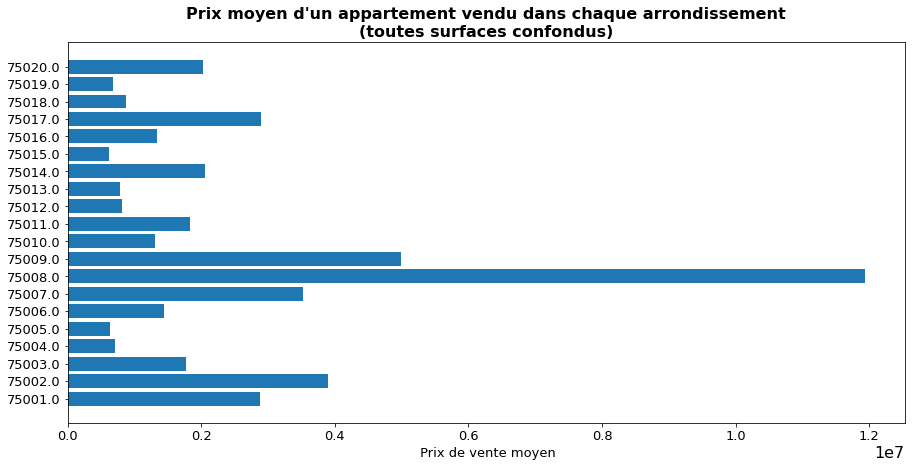

In [28]:
plt.figure(figsize = (15, 7))
plt.barh(y = (mean_prix_ar["code_postal"]).astype(str), #this is an inverted bar chart, so the first argument is the y axis
        width = mean_prix_ar["Prix"]) #the second argument shows the x-axis or is the width 
plt.xticks( fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Prix moyen d'un appartement vendu dans chaque arrondissement\n(toutes surfaces confondus)", 
          fontsize = 16, 
          fontweight = "bold")
plt.xlabel(" Prix de vente moyen", fontsize = 13 )
# plt.tight_layout()
# plt.savefig("Prix_moyen_vente_paris.png")
plt.show()

In [29]:
# Répartition du nombre d'appart vendus par nb de pièces dans Paris
df_paris.groupby('nb_pieces')['nb_pieces'].count()

nb_pieces
0.0       16
1.0     2719
2.0     2570
3.0     1299
4.0      491
5.0      200
6.0       91
7.0       30
8.0       14
10.0       3
12.0       1
Name: nb_pieces, dtype: int64

### 3.5 : Etude de la corrélation

Les coefficients de corrélation se situent dans l’intervalle [-1,1].

    si le coefficient est proche de 1 c’est qu’il y a une forte corrélation positive
    si le coefficient est proche de -1 c’est qu’il y a une forte corrélation négative
    si le coefficient est proche de 0 en valeur absolue c’est qu’il y a une faible corrélation

<AxesSubplot:>

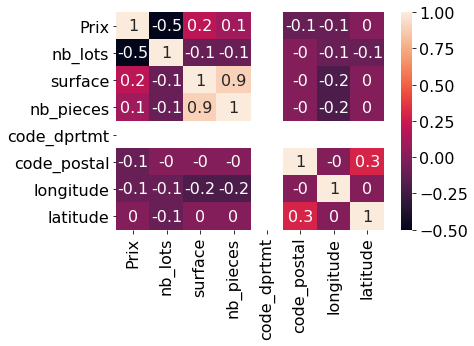

In [30]:
matrice_corr = df_paris.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

Interpréation : 
- On s'intéresse au Prix des appartements vendu et on cherche à connaitre s'il y a une corrélation avec l'une des variables explicatives dans le dataframe "df_paris". 
- En gros on cherche à savoir quelle colonne à une corrélation forte avec le prix.
- On constate que le "surface" à la plus forte corrélation avec le Prix (d'après la matrice de corrélation ci-dessus = 0.2) par rapport aux autres variables explicatives potentielles.

### 3.6 : Recherche manuelle de la courbe de régression linéaire entre surface et le prix

On se concentre sur les appartements vendus dans paris entre 100000 et 500000 de surface < 100m²

In [31]:
# On regroupe les appartements ayant coutés ente 100000 et 500000 et inférieur à 100m²
groupe = df_paris[(df_paris['Prix']>=100000)&
                  (df_paris['Prix']<=500000)&
                  (df_paris['surface']<=100)
                 ]
groupe.head(2)

,id_parcelle,nature_vente,date_vente,Prix,nb_lots,surface,local,nb_pieces,code_dprtmt,adresse_nom_voie,code_postal,longitude,latitude,Adresse,Annee,Mois,jour
32856,75103000AI0049,Vente,2020-01-08,370000.0,1,21.0,Appartement,1.0,75,RUE DES ARCHIVES,75003.0,2.359899,48.863217,79.0 RUE DES ARCHIVES 75003.0,2020,01,08
32863,75103000AJ0005,Vente,2020-01-16,435000.0,1,72.0,Appartement,2.0,75,BD DU TEMPLE,75003.0,2.365697,48.863902,13.0 BD DU TEMPLE 75003.0,2020,01,16


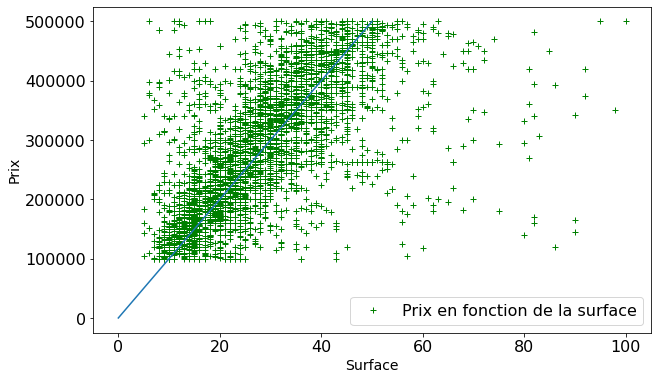

In [32]:
# Plot pour superposer la courbe de regression (recherché manuellement) 
# et la répartition des surfaces des appartements en fonction de leur prix
fig = plt.figure(figsize=(10,6))
plt.plot(groupe['surface'],groupe['Prix'],'+',c='green',label='Prix en fonction de la surface')
plt.plot([0, 50], [0, 500000] ) # jouer avec ces paramètres pour faire varier la droite bleue

plt.xlabel('Surface', fontsize=14)
plt.ylabel('Prix', fontsize=14)
plt.legend()
plt.show()

## 4 - Estimateurs

#### Rappel de cours pour calculer les a et b de l'equation y = ax + b 

<img src="img/reglin4.png" width="600">

### 4.1 : Estimateur du prix methode David

In [33]:
x=df_paris['surface']
y=df_paris['Prix']

In [34]:
# Calcul des membres principaux de la solution a et b de l'équation y =ax + b 
# Puis calcul du a

un=len(x)*(df_paris['surface']*df['Prix']).sum()

sumx=df_paris['surface'].sum()
sumy=df_paris['Prix'].sum()

deux=len(df_paris['surface'])*((df_paris['surface']*df_paris['surface']).sum())

trois=sumx*sumx

a=(un-(sumx*sumy))/(deux-trois)
a

35780.33209187344

In [35]:
# Puis calcul du b
quatre=sumy*((df_paris['surface']*df_paris['surface']).sum())
cinq=sumx*(df_paris['surface']*df_paris['Prix']).sum()
six=len(df_paris['surface'])*((df_paris['surface']*df_paris['surface']).sum())
sept=sumx*sumx

b=(quatre-cinq)/(six-sept)
b

563244.1054112952

In [36]:
a=35780.33209187344
b=563244.1054112952

def pred(x,a,b):
    return a*x+b

pred(20,a,b)

1278850.7472487641

Interpration : d'après ce modèle un appartement de 20m² coûterait 1278850. Ca semble un peu elévée, c'est surement du aux "Outliers". Il faudrait filtrer ces "Outliers" dans le dataset pour affiner la prédiction. 

### 4.2 : Prédiction avec Scikit learn - methode Josselin

In [37]:
import numpy as np

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df_paris[['surface']], df_paris.Prix)
reg.predict(np.array([[20]]))

array([1278850.74724874])

Interprétation : on trouve la même valeur que dans le modèle précédent (20m² = 1278850).
Ce qui montre que le calcul à la main et via l'outil de calcul Scitkit learn revient au même mais scikit learn est plus rapide. 
=> pour la valeur élevé il faut surement nettoyer encore les valeur du dataset pour avoir une prédiction plus juste. 

### 4.3 : Estimateur - autre méthode vue avec David  - ( PAS REUSSI A REFAIRE avec notre dataset)

<img src="img/Estimateur_des_moindres_carres.png" width="490">

## 5 - Evaluation de l'estimateur avec le RMSE

- Pour évaluer l'ecart entre notre estimateur et les données, nous allons construire un outil qui permet de le quantifier.
- Le RMSE (Root Mean Squared Error) <=> La racine de la moyenne des erreurs au carré ...

<img src="img/rmse.jpg" width="400">

Pour cela on va:  
- Quantifier la precision de vos predicteurs en caclulant le RMSE

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Prix_m2['prix_m2_reel'],Prix_m2['prix_m2_ref'] ))
print(rmse)

53931.549339765785


# GEOLOCALISATION